### Imports

In [ ]:
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import uniform
from scipy.stats import laplace
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy.integrate import quad
import pickle as pkl

rng = np.random.default_rng()
plt.style.use('seaborn-v0_8-deep')

## Part 1 - Numerical vs. Analytical Eval. - Simple Symmetric R.W

$P_n(j)=\frac{1+(-1)^{n+j}}{2}\frac{1}{2^n}{n \choose n_l}$ - Calculate Analytically

$P_n(j)=\frac{1}{2\pi}\int_{-π}^{π}{λ(θ)^ne^{i\theta j}d\theta}$ - Evaluate Numerically

In [22]:
def biased_random_walk(n_walkers, n_steps, S_0, p_right, p_stay):
  dirs = [-1,0,1]
  simu = rng.choice(dirs, size=(n_walkers,n_steps), p=[1-p_right-p_stay,p_stay,p_right])
  steps = np.insert(simu, 0, S_0, axis=1) #
  trajectories = np.array(np.cumsum(steps, axis=1)) #calculates the positions after each step
  return trajectories

def analitical_P_n_0_biased(n):
  return (1/(4**n))*math.comb(2*n,n)

def analitical_P_n_j(n, j, p_right):
  if (n+j)% 2 == 0:
    return math.comb(n,(int((n+j)/2)))*(p_right**(int((n+j)/2)))*((1-p_right)**(int((n-j)/2)))
  else:
    return 0


In [ ]:
### Bias RW ###
n_walkers = int(1E6)
n_steps = 100
S_0 = 0
p_right = 0.25
p_stay = 0.5
trajectories = biased_random_walk(n_walkers, n_steps, S_0, p_right, p_stay)
np.save('Question_1_data/trajectories_(a).npy', trajectories)

In [15]:
### Symmetric RW ###
n_walkers = int(1E6)
n_steps = 100
S_0 = 0
p_right = 0.5
p_stay = 0
trajectories = biased_random_walk(n_walkers, n_steps, S_0, p_right, p_stay)
np.save('Question_1_data/trajectories_symmetric_(a).npy', trajectories)

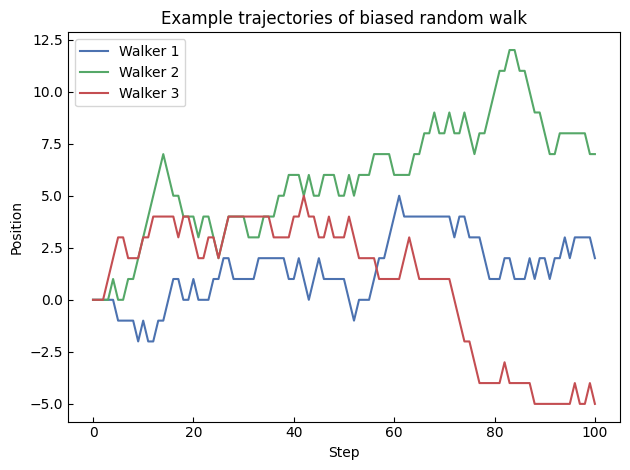

In [13]:
### Plot 3 example trajectories ###
fig, ax = plt.subplots()
for i in range(3):
  ax.plot(trajectories[i], label=f'Walker {i+1}')
ax.set_xlabel('Step')
ax.set_ylabel('Position')
ax.legend()
ax.tick_params(direction='in')
ax.title.set_text('Example trajectories of biased random walk')
plt.tight_layout()
plt.savefig('Question_1_plots/example_trajectories_(a).png',dpi=300)
plt.show()

[  0   2   4   6   8  10  12  14  16  18  20  22  24  24  28  32  36  40
  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100]


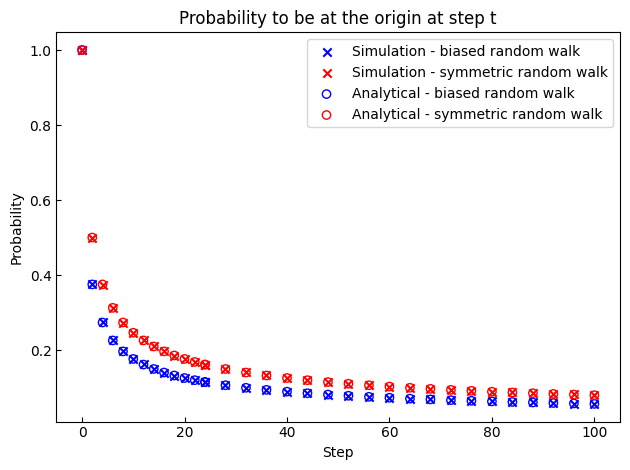

In [43]:
### Plot probability to be at the origin at step t ###
biased_trajectories = np.load('Question_1_data/trajectories_(a).npy')
symmetric_trajectories = np.load('Question_1_data/trajectories_symmetric_(a).npy')
indices = np.concatenate((np.arange(0,25,2), np.arange(24,101,4)))
print(indices)
prob_origin_biased = np.mean(biased_trajectories == 0, axis=0)[indices]
prob_origin_symm = np.mean(symmetric_trajectories == 0, axis=0)[indices]
prob_origin_biased_analitical = np.array([analitical_P_n_0_biased(n) for n in range(n_steps+1)])[indices]
prob_origin_symm_analitical = np.array([analitical_P_n_j(n, 0, 0.5) for n in range(n_steps+1)])[indices]
steps_to_print = np.arange(n_steps+1)[indices]
fig, ax = plt.subplots()
ax.scatter(steps_to_print, prob_origin_biased, label='Simulation - biased random walk', marker='x', color='blue')
ax.scatter(steps_to_print, prob_origin_symm, label='Simulation - symmetric random walk', marker='x', color='red')
ax.scatter(steps_to_print, prob_origin_biased_analitical, label='Analytical - biased random walk', facecolors='none', edgecolors='blue')
ax.scatter(steps_to_print, prob_origin_symm_analitical, label='Analytical - symmetric random walk', facecolors='none', edgecolors='red')
ax.set_xlabel('Step')
ax.set_ylabel('Probability')
ax.title.set_text('Probability to be at the origin at step t')
ax.tick_params(direction='in')
ax.legend()
plt.tight_layout()
plt.savefig('Question_1_plots/prob_origin_(a).png',dpi=300)
plt.show()

In [ ]:
def characteristic_function_n_steps(theta,n_steps):
  return ((1+math.cos(theta))/2)**n_steps

integrand = lambda theta,j,n: (1/(2*np.pi))*characteristic_function_n_steps(theta, n)*np.exp(-1j*theta*j)
n = 20
j_s = np.unique(biased_trajectories)
analytical_probs_pnj = [quad(integrand, -np.pi, np.pi, args=(j,n))[0] for j in j_s]
pnj = []
for j in j_s:
  pnj.append(np.sum(biased_trajectories[:,n+1] == j))
pnj = np.array(pnj)
pnj = pnj/np.sum(pnj)

c:\Users\Nir Sherf\scoop\apps\python\current\Lib\site-packages\scipy\integrate\_quadpack_py.py:575: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


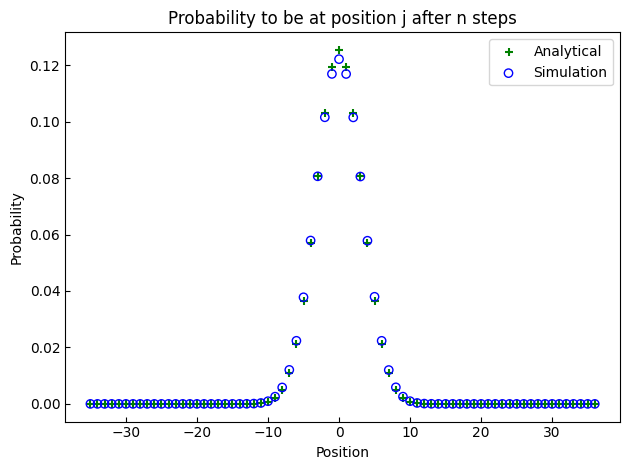

In [61]:
fig, ax = plt.subplots()
ax.scatter(j_s, analytical_probs_pnj, label='Analytical', marker='+', facecolors='green')
ax.scatter(j_s, pnj, label='Simulation', facecolors='none', marker='o', edgecolors='blue')
ax.set_xlabel('Position')
ax.set_ylabel('Probability')
ax.title.set_text('Probability to be at position j after n steps')
ax.tick_params(direction='in')
ax.legend()
plt.tight_layout()
plt.savefig('Question_1_plots/pnj(a).png',dpi=300)
plt.show()

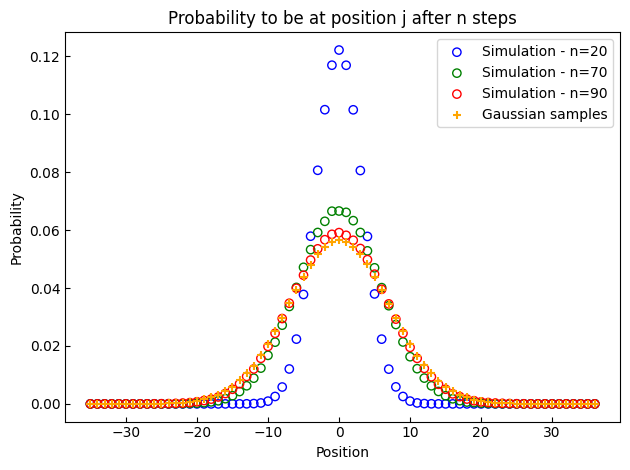

In [84]:
### Compare to gaussian (CLT) ###
n = 20
pnj_20steps = []
for j in j_s:
  pnj_20steps.append(np.sum(biased_trajectories[:,n+1] == j))
pnj_20steps = np.array(pnj_20steps)
pnj_20steps = pnj_20steps/np.sum(pnj_20steps)

n = 70
pnj_70steps = []
for j in j_s:
    pnj_70steps.append(np.sum(biased_trajectories[:,n+1] == j))
pnj_70steps = np.array(pnj_70steps)
pnj_70steps = pnj_70steps/np.sum(pnj_70steps)

n = 90
pnj_90steps = []
for j in j_s:
    pnj_90steps.append(np.sum(biased_trajectories[:,n+1] == j))
pnj_90steps = np.array(pnj_90steps)
pnj_90steps = pnj_90steps/np.sum(pnj_90steps)

mean = 0 
std = np.sqrt(n_steps/2)
x = j_s
gaussian = norm.pdf(x, mean, std)
gaussian_samples = rng.normal(mean, std, int(1E6))

def bin_specific_sites(sites, data):
    bin_width = np.diff(sites)
    first_edge = sites[0] - bin_width[0] / 2
    last_edge = sites[-1] + bin_width[-1] / 2

    bin_edges = np.concatenate([[first_edge], sites[:-1] + bin_width / 2, [last_edge]])
    countes, _ = np.histogram(data, bins=bin_edges, density=True)
    return bin_edges, countes

bins, counts = bin_specific_sites(j_s, gaussian_samples)
bin_centers = (bins[1:] + bins[:-1]) / 2

fig, ax = plt.subplots()
ax.scatter(j_s, pnj_20steps, label='Simulation - n=20', facecolors='none', marker='o', edgecolors='blue')
ax.scatter(j_s, pnj_70steps, label='Simulation - n=70', facecolors='none', marker='o', edgecolors='green')
ax.scatter(j_s, pnj_90steps, label='Simulation - n=90', facecolors='none', marker='o', edgecolors='red')
ax.scatter(bin_centers, counts, label='Gaussian samples', marker='+', facecolors='orange')
ax.set_xlabel('Position')
ax.set_ylabel('Probability')
ax.title.set_text('Probability to be at position j after n steps')
ax.tick_params(direction='in')
ax.legend()
plt.tight_layout()
plt.savefig('Question_1_plots/pnj_gaussian(a).png',dpi=300)
plt.show()